In [1]:
%cd ..
%cd root
import numpy as np
import pandas as pd
df = pd.read_csv("cleaned_data.csv")
df.head()
df.fillna('', inplace=True)
print(len(df))
x = df["0"].tolist()
y = df["1"].tolist()

/
/root
56297


In [3]:
vocab = []
freq = dict()
from tqdm.notebook import tqdm
for sentence in tqdm(x):
  for word in sentence.split(" "):
    if word not in vocab:
      vocab.append(word)
      freq[word] = 1
    else:
      freq[word] += 1

In [9]:
len(freq)

18207

In [0]:
word = []
frequency = []
for item in freq.items():
  word.append(item[0])
  frequency.append(item[1])

In [0]:
df1 = pd.DataFrame(columns=["Word","Frequency"])
df1["Word"] = word
df1["Frequency"] = frequency

In [15]:
df1["Word"][df1["Frequency"].idxmax()]

'i'

In [0]:
df2 = df1[df1["Frequency"] >= 5]
df3 = df1[df1["Frequency"] < 5]

In [21]:
print("{},{}".format(len(df3),len(df2)))

12692,5515


In [23]:
df3.head()

,Word,Frequency
10,pixel,2
28,min,4
29,samsung,4
43,lg,2
44,optimus,4


In [24]:
%pip install autocorrect

     |████████████████████████████████| 1.8MB 4.5MB/s 
  Created wheel for autocorrect: filename=autocorrect-1.1.0-cp36-none-any.whl size=1810772 sha256=a3eb1893441ff6ee1d0694f4c9b412b215c74414a04df14dca784cc49d36f2a6
  Stored in directory: /root/.cache/pip/wheels/78/7f/b1/527522820ae623df6a2dbe14f778d23adaea4bebe43f7ebcfe
Successfully built autocorrect


In [25]:
vocab = []
freq = dict()
from autocorrect import Speller
spell = Speller()
for sentence in tqdm(x):
  sentence = spell(sentence)
  for word in sentence.split(" "):
    if word not in vocab:
      vocab.append(word)
      freq[word] = 1
    else:
      freq[word] += 1

In [34]:
word = []
frequency = []
for item in freq.items():
  word.append(item[0])
  frequency.append(item[1])
df1 = pd.DataFrame(columns=["Word","Frequency"])
df1["Word"] = word
df1["Frequency"] = frequency
df2 = df1[df1["Frequency"] >= 3]
df3 = df1[df1["Frequency"] < 3]
print("# of removed Vocab: {}, # of alright vocab: {}".format(len(df3),len(df2)))

# of removed Vocab: 8847, # of alright vocab: 7648


In [31]:
df3[df3["Frequency"] == 3]

,Word,Frequency
240,cornea,3
248,boof,3
263,blender,3
312,cursed,3
330,singlehood,3
...,...,...
16429,ef,3
16432,alist,3
16448,brink,3
16455,kinky,3


In [32]:
x1 = []
y1 = []
for sentence in tqdm(x):
  sentence = spell(sentence)
  x1.append(sentence)
for sentence in tqdm(y):
  sentence = spell(sentence)
  y1.append(sentence)

In [0]:
nicedf = pd.DataFrame(columns=["x1", "y1"])
nicedf["x1"] = x1
nicedf["y1"] = y1
nicedf.to_csv("AL_clean_1.csv")

In [37]:
nicedf.head()

,x1,y1
0,what kind of phones do you guys have,i have a pixel it is pretty great much better ...
1,i have a pixel it is pretty great much better ...,does it really charge all the way in min
2,does it really charge all the way in min,pretty fast i have never timed it but it is un...
3,what kind of phones do you guys have,tamlung galaxy j it is my first cell phone and...
4,tamlung galaxy j it is my first cell phone and...,what do you think of it anything you do not like


In [0]:
okwords = df2["Word"].tolist()

In [46]:
x2 = []
for sentence in tqdm(x1):
  sent = []
  for word in sentence.split(" "):
    if word in okwords and word != " ":
      sent.append(word)
  x2.append(" ".join(sent))
y2 = []
for sentence in tqdm(y1):
  sent = []
  for word in sentence.split(" "):
    if word in okwords and word != " ":
      sent.append(word)
  y2.append(" ".join(sent))

In [0]:
nicedf["x1"] = x2
nicedf["y1"] = y2

In [48]:
x2[:5]

['what kind of phones do you guys have',
 'i have a it is pretty great much better than what i had before',
 'does it really charge all the way in   min',
 'what kind of phones do you guys have',
 'tamlung galaxy j it is my first cell phone and i have had it for   months']

In [0]:
nicedf["x_count"] = nicedf['x1'].str.split().apply(len)
nicedf["y_count"] = nicedf['x1'].str.split().apply(len)

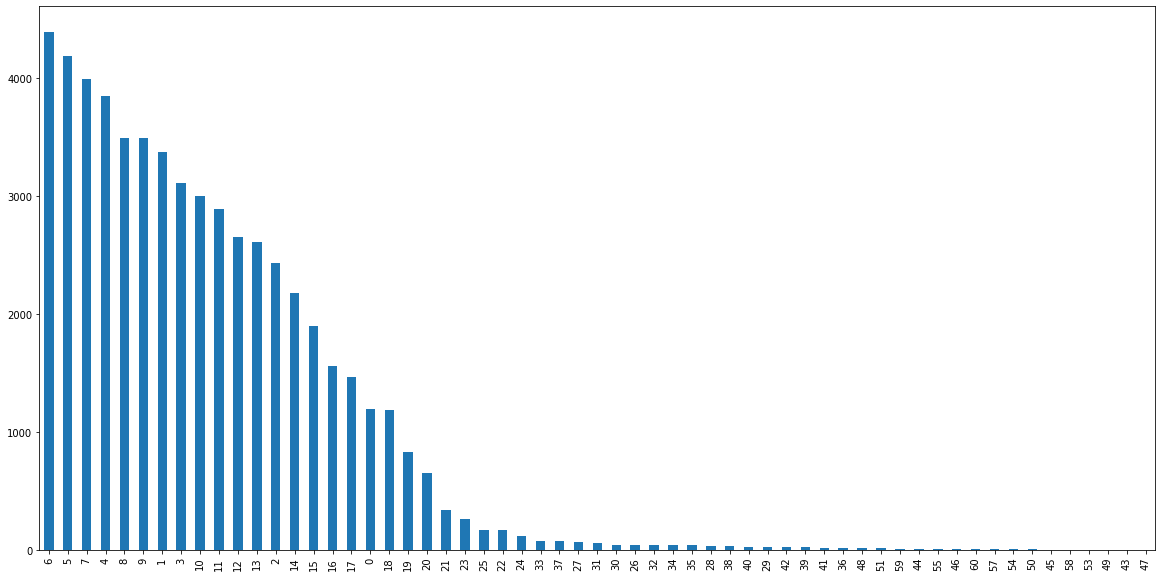

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
nicedf["x_count"].value_counts().plot.bar()

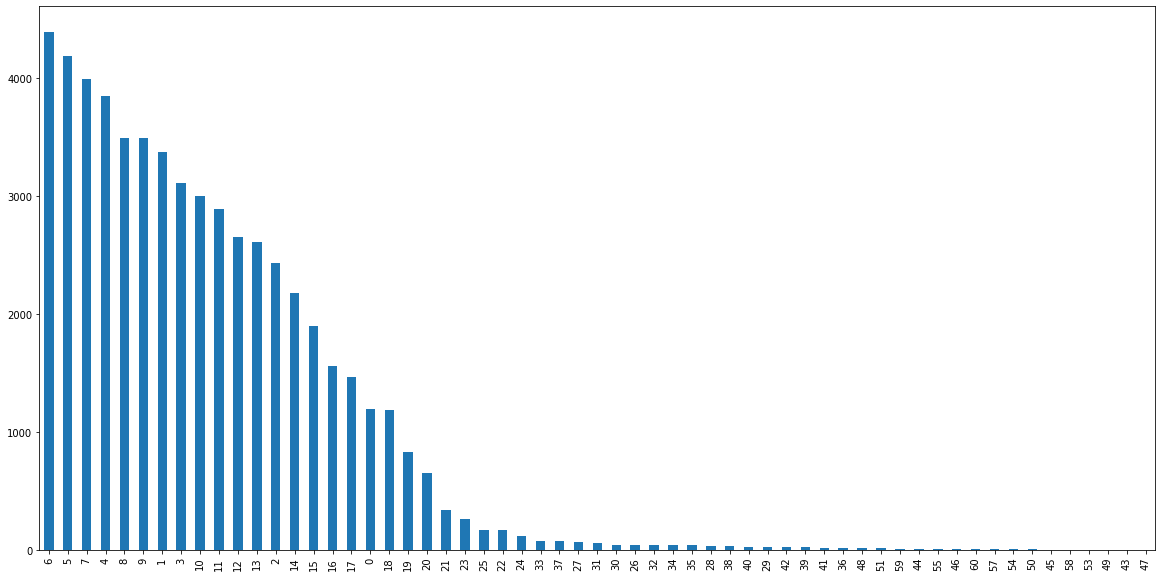

In [52]:
plt.figure(figsize=(20,10))
nicedf["y_count"].value_counts().plot.bar()

In [53]:
x3 = []
for sentence in tqdm(x2):
  if len(sentence.split(" ")) <= 25:
    x3.append(sentence)
  else:
    words = sentence.split(' ')
    words = words[:25]
    x3.append(" ".join(words))
  
y3 = []
for sentence in tqdm(y2):
  if len(sentence.split(" ")) <= 25:
    y3.append(sentence)
  else:
    words = sentence.split(' ')
    words = words[:25]
    y3.append(" ".join(words))

In [0]:
x4 = []
for sent in x3:
  sent = sent.replace("     ", " ")
  sent = sent.replace("    ", " ")
  sent = sent.replace("   ", " ")
  sent = sent.replace("  ", " ")
  sent = sent.replace("tamlung", "samsung")
  x4.append(sent)
y4 = []
for sent in y3:
  sent = sent.replace("     ", " ")
  sent = sent.replace("    ", " ")
  sent = sent.replace("   ", " ")
  sent = sent.replace("  ", " ")
  sent = sent.replace("tamlung", "samsung")
  y4.append(sent)

In [63]:
y4[:10]

['i have a it is pretty great much better than what i had before',
 'does it really charge all the way in min',
 'pretty fast i have never it but it is under half an hour',
 'samsung galaxy j it is my first cell phone and i have had it for months',
 'what do you think of it anything you do not like',
 'i love it i cannot think of anything i do not like about it',
 'optimums v i know it is old',
 'if it does it is job it is good enough',
 'do not kill yourself op',
 'i will not give them the satisfaction ']

In [0]:
nicedf["x1"] = x4
nicedf["y1"] = y4
nicedf.to_csv("AL_clean_2.csv")